## Create vegetation and land use type maps for each ecoregion

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
#import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import util

In [10]:
#path to clean data folder
clean_data = "../data/clean/"
raw_data = "../data/raw/"

# Administrative boundaries
soco_bound = gpd.read_file(clean_data + "sonoma_county_boundary/sonoma_county_boundary.shp")
ca_state = gpd.read_file(clean_data + "ca_state_boundary/ca_state_boundary.shp")

# Sonoma Veg
sonoma_veg_simp = gpd.read_file(clean_data + "sonoma_veg/sonoma_veg.shp")

# CA EPA eco regions
ecoregions = gpd.read_file(clean_data + "soco_ecoregion_l4/soco_ecoregion_l4.shp")

# Land use 
landuse = gpd.read_file(raw_data + "soco_landuse/soco_landuse.shp") 

In [11]:
# clean the data
ecoregions_simp = util.simplify_ecoregions(ecoregions)
soco_bound = soco_bound.to_crs(epsg=2226)
ca_state = ca_state.to_crs(epsg=2226)
landuse_simp = util.longname_landuse(landuse)

In [18]:
ecoregion_list = ecoregions_simp.l4_simple.unique()

<AxesSubplot:>

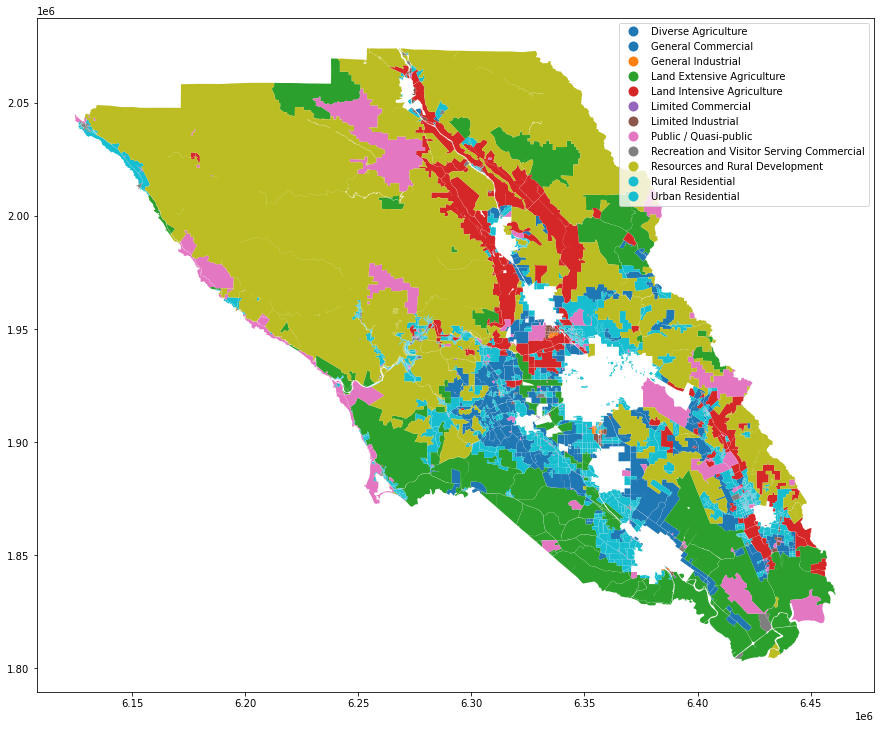

In [46]:
landuse_simp.plot(column = "landuse", figsize=(15,15), legend = True)

In [12]:
# set the simplified veg map colors
from matplotlib.colors import ListedColormap
colors = ["peru", "blue", "red", "grey", "green", "bisque", "yellow"]
veg_cmap=ListedColormap(colors)

In [31]:
def map_ecoregion_char(ecoregions: gpd.GeoDataFrame, characteristic: gpd.GeoDataFrame, which_eoi: str):

    # Get the eco region of of interest
    eoi = ecoregions[ecoregions["l4_simple"]==which_eoi]

    # intersect the veg map and the ecoregion of interest
    eoi_intersect = gpd.overlay(characteristic, eoi, how='intersection')

    # Get the extent of the eoi for mapping
    xlim = ([eoi.total_bounds[0] - 0.009e6,  eoi.total_bounds[2] +  0.009e6])
    ylim = ([eoi.total_bounds[1] - 0.009e6,  eoi.total_bounds[3] +  0.009e6])

    # plot the simplified sonoma veg data
    fig, ax = plt.subplots(figsize=(15,15))
    ca_state.plot(ax=ax, edgecolor = "grey", color = "#e2e2e2")
    eoi_intersect.plot(ax=ax, column = "natural_si", cmap=veg_cmap, legend = True)
    soco_bound.plot(ax=ax, edgecolor = "black", color = "None")
    ecoregions_simp.plot(ax=ax, edgecolor = "black", color = "None")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor('#add8e6')
    return fig, ax 

100%|██████████| 9/9 [08:26<00:00, 56.31s/it]


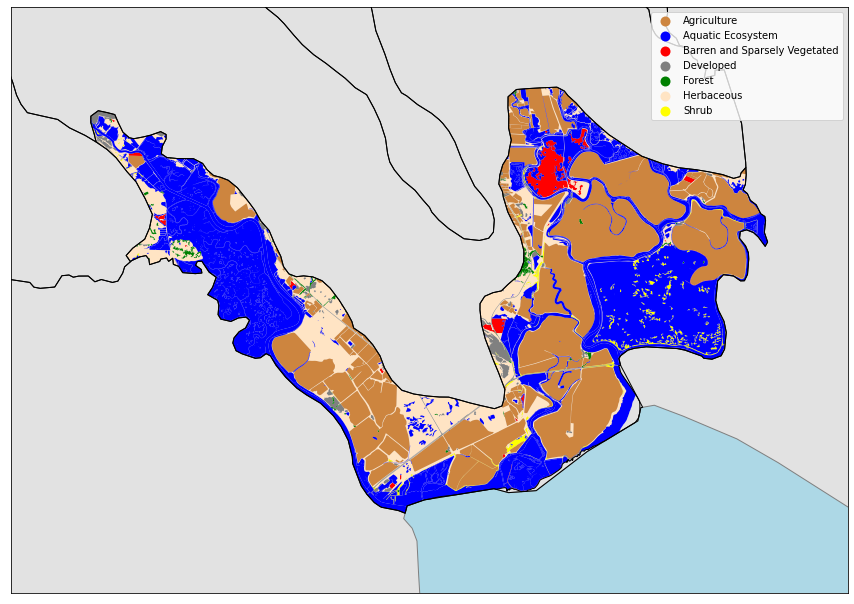

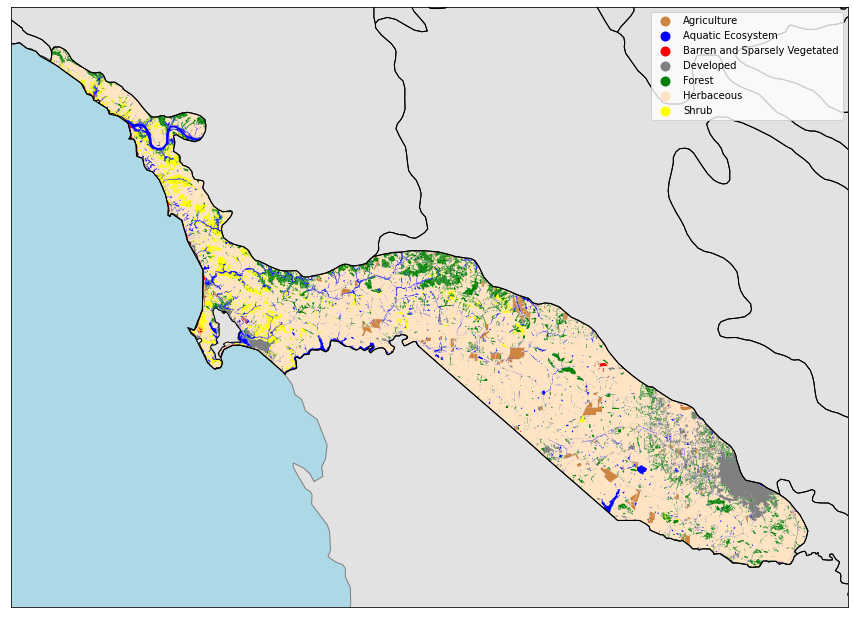

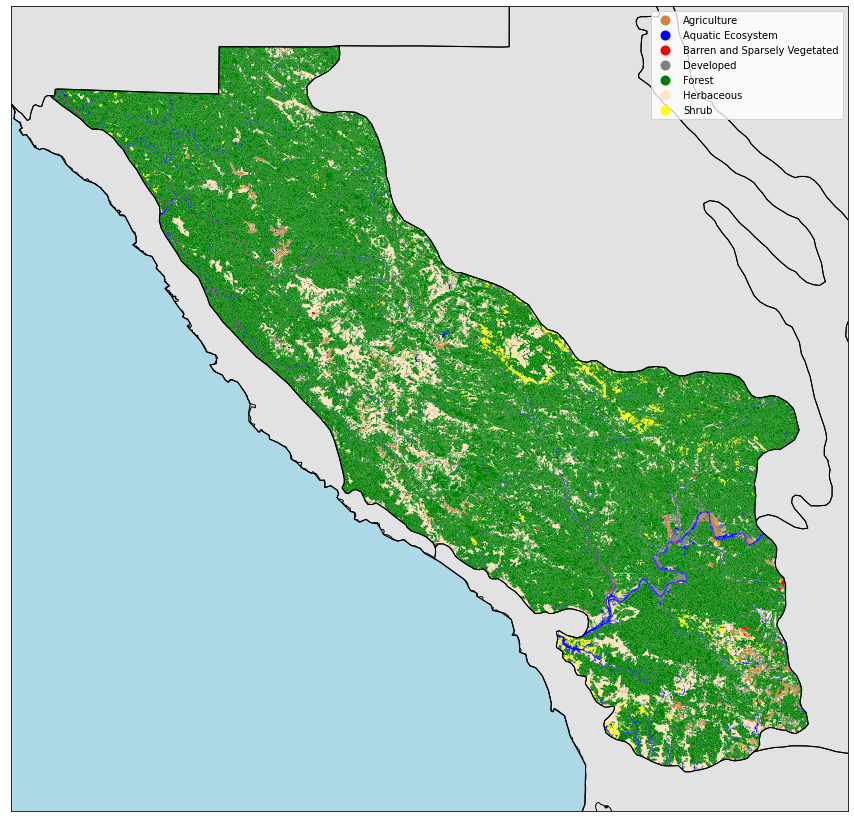

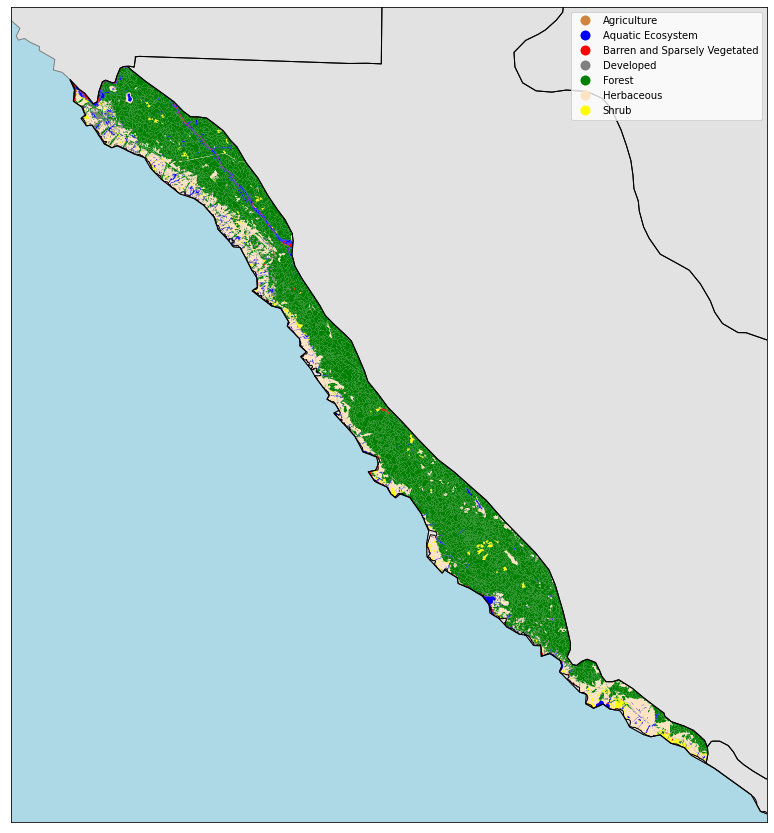

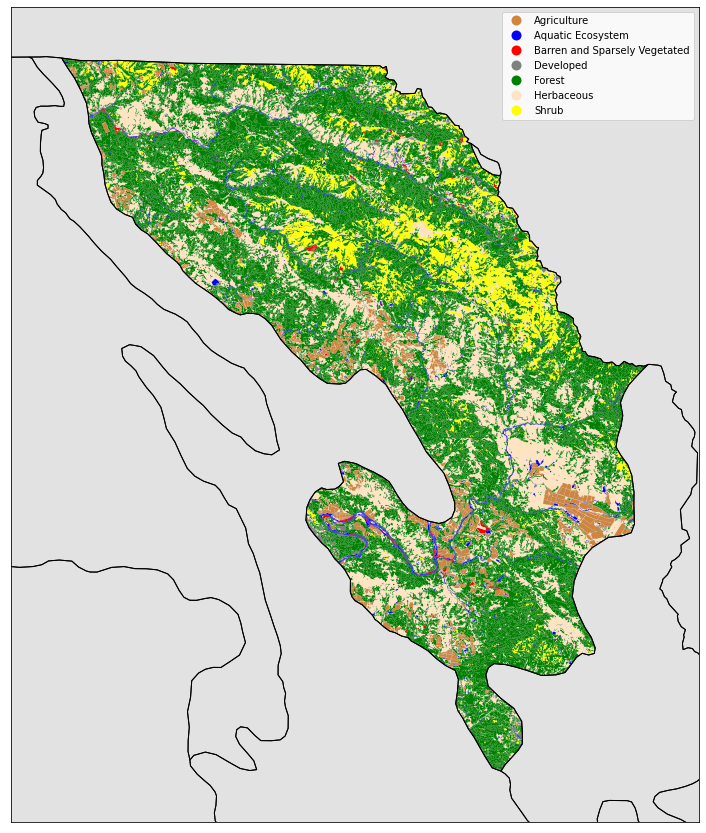

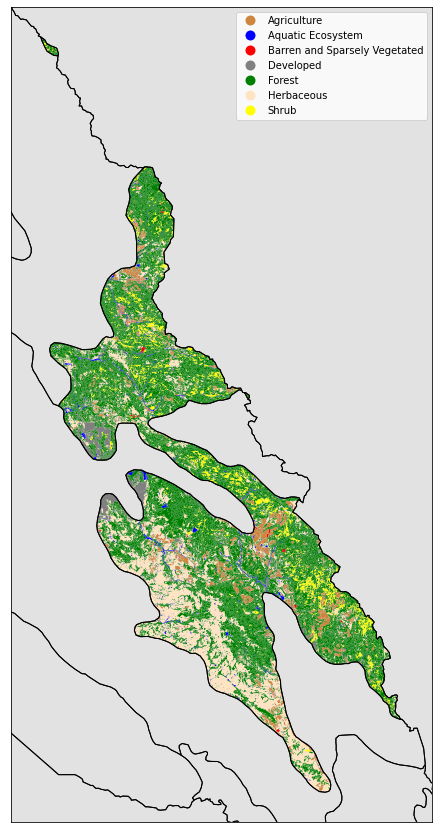

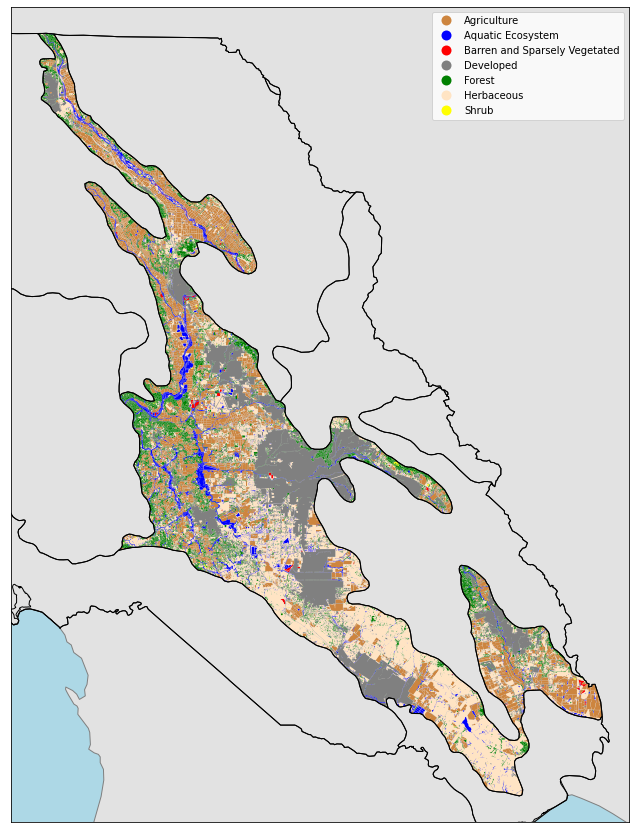

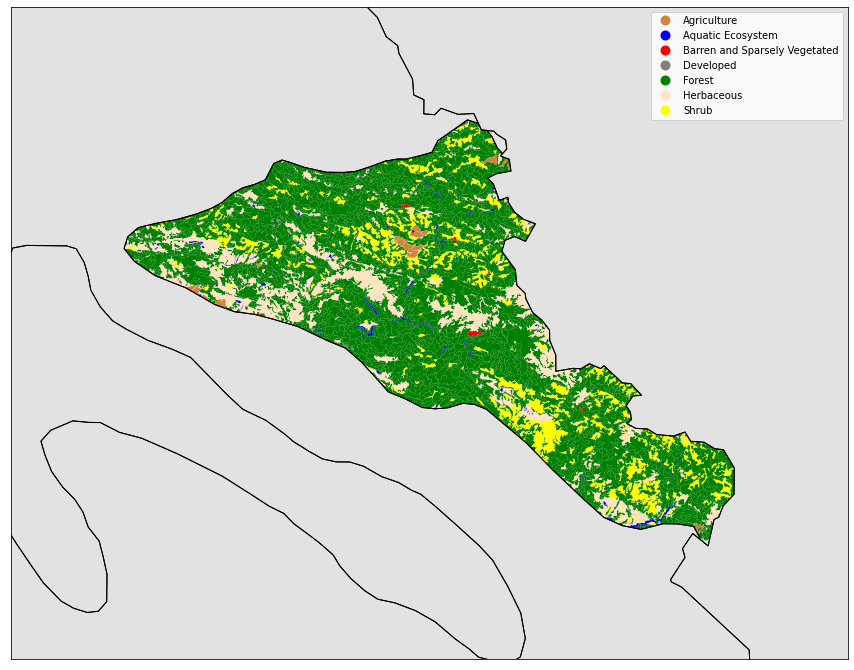

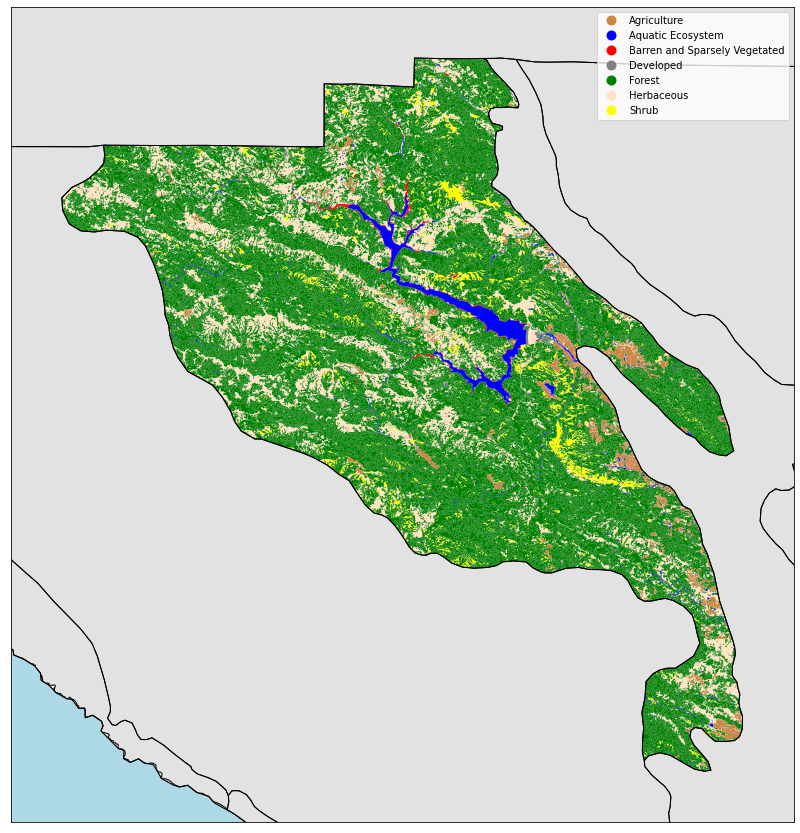

In [32]:
from tqdm import tqdm
# loop through the ecoregions to create the veg map maps
for eco in tqdm(ecoregion_list):
    fig, _ = map_ecoregion_char(ecoregions_simp, sonoma_veg_simp, eco)
    snake_case_eco = eco.lower().replace(" ", "_").replace("/", "_").replace("-", "_")
    fig.savefig(f"../output/maps/{snake_case_eco}_veg.png", dpi=350)